# <font color='red'> EDA & Data Preprocessing on Google App Store Rating Dataset </font> 

# Domain: Mobile device apps
# Context:
- The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.
# Objective:
- The Goal is to explore the data and pre-process it for future use in any predictive analytics study.
# Data set Information:
- Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

# Attribute Information:

| SL.No | Attribute      | Description                                |
|-------|-------------------|---------------------------------------------|
| 1     | App               | Application name                            |
| 2     | Category          | Category the app belongs to.                              |
| 3     | Rating            | Overall user rating of the app                          |
| 4     | Size              | Size of the app                       |
| 5     | Installs          | Number of user reviews for the app                    |
| 6     | Type              |  Paid or Free                           |
| 7     |  Price             | Price of the app                            |
| 8     | Content Rating     | Age group the app is targeted at - children/Mature 21+ /Adult                         |
| 9     |  Genres            |An app can belong to multiple genres (apart from its main category). For eg. a|
|        |                     | musical family game will belong to Music, Game, Family genres.   |                     
| 10    | Last Updated              | Date when the app was last updated on play store.                       |
| 11    | Current Ver       | Current version of the app available on play store.                         |
| 12    | Android Ver        |    Min required Android Version.         |





# Questions:-

# 1. Importing the required libraries and read the dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_csv("Apps_data+(1) (1).csv")

# 2. Checking the first few samples, shape, info of the data and try to familiarize ourself with different features 

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.sample() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0+,Free,0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up


In [5]:
df.shape 

(10841, 13)

<b><font color='green'> ~ In the dataset there are a total of 10841 rows and 13 columns 

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<b> Data Types 
    
<b><font color='green'> ~ Objects:There are a total of 12 columns with object data type(includes non numeric data)</b></font>
    
<b><font color ='green'>~ Float: Only Rating column is a numeric column with float data type. 

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<b> Inferences:
    
<b><font color="green">~ There are a total of 9367 entries for the rating section 

<b><font color='green'>~ The average rating of the apps is aprox: 4.19

<b><font color='green'>~ Minimum value is (1) and the Maximum value is (19)  {Considering untreated data:including outliers}

In [8]:
df.describe(include='object').T 

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


<b><font color='green'> Inferences:

- App: There are 10,841 entries. It seems to represent the names of different applications. There are 9,660 unique applications, and 'ROBLOX' is the most frequent app name, occurring 9 times.
- Category: There are 34 unique categories, with 'FAMILY' being the most frequent category, appearing 1,972 times.
- Reviews: There are 6,002 unique review counts. The most common review count is 0, appearing 596 times.
- Size: 'Varies with device' appears 1,695 times, and there are 462 unique sizes. It seems that there is a considerable number of apps with variable sizes.
- Installs: There are 22 unique install counts. The most frequent install count is '1,000,000+', occurring 1,579 times.
- Type: There are 3 unique types. 'Free' is the most common type, appearing 10,039 times.
- Price: There are 93 unique price points. The most common price is 0, occurring 10,040 times.
- Content Rating: There are 6 unique content ratings. 'Everyone' is the most frequent content rating, appearing 8,714 times.
- Genres: There are 120 unique genres. 'Tools' is the most common genre, appearing 842 times.
- Last Updated: There are 1,378 unique last updated dates. 'August 3, 2018' is the most frequent date, occurring 326 times.
- Current Ver: There are 2,832 unique versions. 'Varies with device' is the most frequent version, appearing 1,459 times.
- Android Ver: There are 33 unique Android versions. '4.1 and up' is the most frequent version, occurring 2,451 times.
  

In [9]:
df.select_dtypes(include='object').columns 

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<b> Inferences: 
    
<b><font color='green'> ~ All the categorical columns seems relavant for the process of model building (we need to encode them accordingly using Label encoding or by creating dummies(One hot encoding))

# 4. Check if there are any duplicate records in the dataset? if any drop them.


In [10]:
df[df.duplicated()].shape  

(483, 13)

<b><font color="green"> There are a total of 483 duplicate values, however there has to be a column which uniquely identified the data . Based on Key Column: Removing duplicates based on specific column(here 'App'), keeping unique values in those columns.

In [11]:
df.shape 

(10841, 13)

<b><font color="green">~ shape of the data before removing duplicates

In [12]:
df=df.drop_duplicates(subset=['App'],keep='first') 

In [13]:
df.shape 

(9660, 13)

<b><font color="green"> ~ we are left with 9660 rows after removing duplicates based on the App.


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [14]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [15]:
df['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

<b><font color='green'> ~ There is one instane of category which is invalid "1.9". We cam drop that instance.

In [16]:
inval = df[df['Category'] == '1.9'].index 
inval 

Index([10472], dtype='int64')

In [17]:
df.drop(inval,inplace=True)

In [18]:
df.shape 

(9659, 13)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [19]:
df['Rating'].isnull().sum() 

1463

<b><font color='green'>~ There are a total of 1463 null values in the column Rating.

In [20]:
df.dropna(subset='Rating',inplace=True)

In [21]:
df.shape 

(8196, 13)

<b><font color='green'> After having removed(droped) the '1463' null values from the Rating column we are left with '8196' rows 

In [22]:
#Create a new column 'Rating_category'
#using where to apply condition and map data

df['Rating_category'] = np.where(df['Rating'] > 3.5,'high','low')

In [23]:
df['Rating_category'].value_counts() 

Rating_category
high    7322
low      874
Name: count, dtype: int64

<b><font color='green'> ~ Created a new column 'Column_rating' where the values are maped based on the the condition that if 'Rating' >3.5 the column rating is high else its low.
    
<b><font color='green'>~ Thus there are 7322 column ratings that are 'high' and 874 column ratings that are 'low'

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution. 

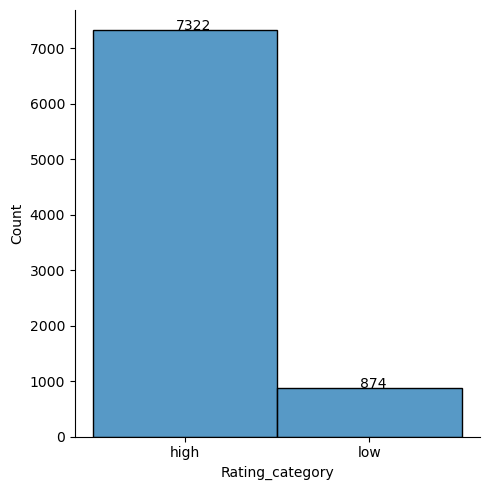

In [24]:
sns.displot(df['Rating_category'])
plt.text(x=-0.05, y= df['Rating_category'].value_counts()[0], s=df['Rating_category'].value_counts()[0])  
plt.text(x=0.95, y= df['Rating_category'].value_counts()[1], s=df['Rating_category'].value_counts()[1])
plt.show() 

In [25]:
df['Rating_category'].value_counts() 

Rating_category
high    7322
low      874
Name: count, dtype: int64

<b><font color='green'> ~For the categorical column 'Rating_category' we can infer that there are two unique values 'high' and 'low' each having a count of '7322' and '874' respectively. 

# 8. Converting the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation) 

In [26]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

In [27]:
df['Reviews'].dtype 

dtype('int64')

<Axes: xlabel='Reviews'>

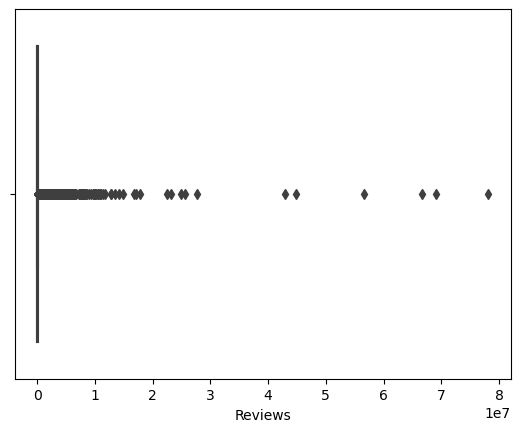

In [28]:
sns.boxplot(data=df,x=df['Reviews'])

<Axes: xlabel='Reviews', ylabel='Density'>

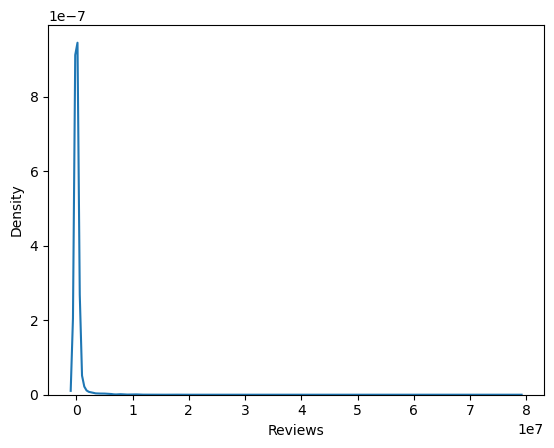

In [29]:
sns.kdeplot(data=df,x=df['Reviews'])

<b><font color ='green'> ~ from the distribution we can clearly see that the data('Reviews' column) is Right Skewed.Moreover the box plot indicates the presence of outliers.
    
<b><font color='green'>~ Thus performing log transformation for the column 'Reviews'

In [30]:
df1 = df.copy()  #creating a copy of the original data frame df 

In [31]:
#defining a function to find the upper and lower wisker 

def outliers(col):
     
    q1,q3 = np.percentile(col,[25,75])
    iqr=q3-q1
    
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    
    return lw,uw


In [32]:
outliers(df1['Reviews']) 

(-65404.5, 109343.5)

In [33]:
lw,uw=outliers(df1['Reviews']) 

In [34]:
df1['Reviews'] = np.where(df1['Reviews'] > uw,uw,df1['Reviews'])
df1['Reviews'] = np.where(df1['Reviews']<lw,lw,df1['Reviews'])

<Axes: xlabel='Reviews'>

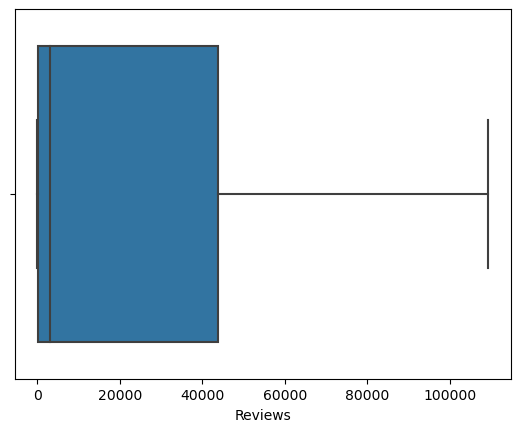

In [35]:
sns.boxplot(data=df,x=df1['Reviews'])  

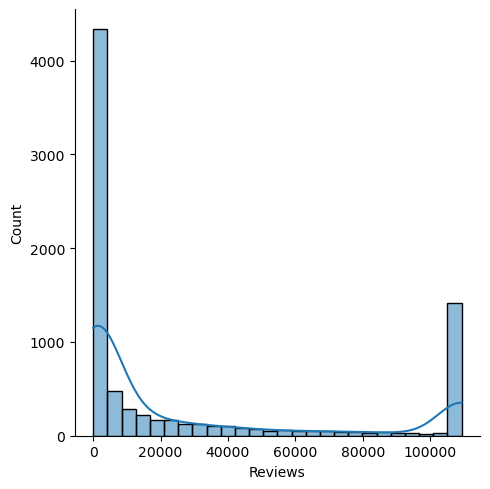

In [36]:
sns.displot(data=df1,x=df1['Reviews'],kde=True)

<b><font color='green'> ~ Created a copy of the original data frame 'df' to 'df1' , and handled outliers in the column 'Review' using IQR method.

<b>~ Using log transformation in the original data frame to handle outliers for the column 'Reviews'

In [37]:
df['Reviews'] = np.log10(df['Reviews'])
df['Reviews'] 

0        2.201397
1        2.985426
2        4.942058
3        5.333737
4        2.985426
           ...   
10834    0.845098
10836    1.579784
10837    0.602060
10839    2.056905
10840    5.600218
Name: Reviews, Length: 8196, dtype: float64

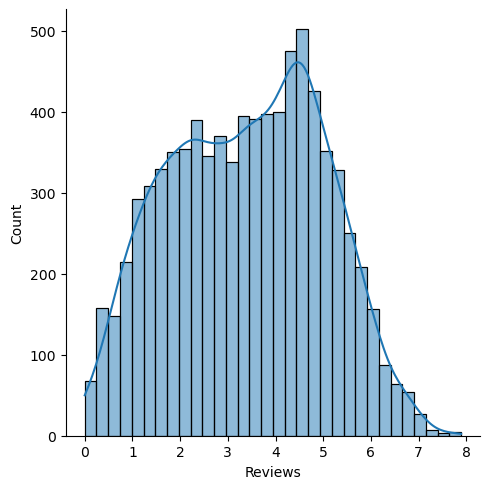

In [38]:
sns.displot(data=df,x=df['Reviews'],kde=True) 

<b><font color='green'> ~ Thus we can see using the logarithmic transformation of the column 'Review' the data points are normalized to a great extend.

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [39]:
df['Size']=df["Size"].replace({"K":"*1e3","k":"*1e3", "M":"*1e6", "Varies with device" :"0" }, regex=True).map(pd.eval).astype(int)

In [40]:
zindex=df[df['Size'] == 0].index  

In [41]:
df.drop(zindex,inplace=True)

In [42]:
df.shape 

(7027, 14)

<b><font color="green">~ Using a library to replace the values of 'K','k','M' and 'Varies with devices' with e3,e6 and 0 
    
<b><font color='green'>~ The map(pd.eval) function is use to apply the pandas function 'pd.eval' which evaluates a Python expression as a string and returns the result.
    
<b><font color='green'>~ The data type is then converted to int data type using the .astype(int) function.
    
<b><font color='green'>~ The rows with'Size'== 0 is then droped by extracting the index and droping it using .drop 

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [43]:
df['Installs'].value_counts()

Installs
1,000,000+        1175
100,000+           989
10,000+            948
1,000+             674
10,000,000+        646
500,000+           461
5,000,000+         450
50,000+            427
5,000+             413
100+               297
500+               195
50,000,000+        111
100,000,000+        96
10+                 67
50+                 56
5+                   9
500,000,000+         8
1+                   3
1,000,000,000+       2
Name: count, dtype: int64

In [44]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [45]:
#itterating through the loop to remove unwanted characters '+' and ',' 
char_remove = ['+',',']
for char in char_remove:
    df['Installs'] = df['Installs'].str.replace(char,"")

In [46]:
#the unwanted characters are removed 
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [47]:
#converting the data type from object to int
df['Installs']=df['Installs'].astype(int)
df['Installs'].dtypes 

dtype('int32')

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [48]:
df['Price'].value_counts()

Price
0          6486
$0.99       103
$2.99        97
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$7.49         1
$1.20         1
Name: count, Length: 68, dtype: int64

In [49]:
df['Price']=df['Price'].str.replace('$',"")
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [50]:
df['Price']=df['Price'].astype(float)
df['Price'].dtypes 

dtype('float64')

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [51]:
df.columns 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [52]:
#Droppping the reduntant columns
df.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [53]:
df.shape 

(7027, 8)

<b><font color='green'>~ After removing the redundant columns we are left with '8' columns out of the '14'

# 13. Encode the categorical columns. 


In [54]:
df.select_dtypes(include='object')

,Category,Type,Content Rating,Rating_category
0,ART_AND_DESIGN,Free,Everyone,high
1,ART_AND_DESIGN,Free,Everyone,high
2,ART_AND_DESIGN,Free,Everyone,high
3,ART_AND_DESIGN,Free,Teen,high
4,ART_AND_DESIGN,Free,Everyone,high
...,...,...,...,...
10833,BOOKS_AND_REFERENCE,Free,Everyone,high
10834,FAMILY,Free,Everyone,high
10836,FAMILY,Free,Everyone,high
10837,FAMILY,Free,Everyone,high


In [55]:
#For Rating category
df['Rating_category'].unique()

array(['high', 'low'], dtype=object)

In [56]:
df['Rating_category']=df['Rating_category'].map({'high':0,'low':1})

In [57]:
#For Content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [58]:
#for type
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [59]:
df['Type']=df['Type'].map({'Free':0,'Paid':1})

In [60]:
#for Category 
df['Category'].unique() 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [61]:
df_dummies=pd.get_dummies(df,columns=['Category','Content Rating'],drop_first=True)
df_dummies.shape 

(7027, 43)

<b>Interpretation 

<b><font color='green'>~Found out all the categorical columns

<b><font color='green'>~Label Encoding for : 'Type' and 'Rating Category'

<b><font color='green'>~One Hot Encoding using pandas.get_dummies() function for : 'Category' and 'Content Rating'

<b><font color='green'>~We have now encoded all the categorical variables and dropped first,so we now have 43-columns and 7027-rows    

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [62]:
X=df_dummies.drop(columns='Rating_category')
y=df_dummies[['Rating_category']]

<b><font color='green'>~While segregating the target and independent features, ensure that we supply a '2-dimensional array' for both X and y. 

# 15. Split the dataset into train and test.


In [63]:
#using sklearn train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=42)

# 16. Standardize the data, so that the values are within a particular range

In [64]:
#Scaling the data generally returns the z-score of every attribute
std_scale = StandardScaler()  #intializing the scaler
std_scale 

StandardScaler()

In [65]:
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)
y_train = std_scale.fit_transform(y_train)
y_test = std_scale.fit_transform(y_test)

In [66]:
print(X_train) 

[[-0.42599451 -0.38297845 -0.17095113 ... -0.21067296 -0.35120363
  -0.014261  ]
 [ 0.8282612  -0.76871253 -0.13278975 ... -0.21067296 -0.35120363
  -0.014261  ]
 [ 0.7965508   0.32641756  0.02139764 ... -0.21067296 -0.35120363
  -0.014261  ]
 ...
 [-1.59028826 -0.81748351 -0.17133275 ... -0.21067296 -0.35120363
  -0.014261  ]
 [-0.8633724   2.8979781  -0.17114387 ... -0.21067296 -0.35120363
  -0.014261  ]
 [ 0.19258132 -0.02828044 -0.16748192 ... -0.21067296 -0.35120363
  -0.014261  ]]


In [67]:
X_test 

array([[ 1.08944347,  0.7775688 , -0.13528944, ..., -0.21718612,
         2.79718926,  0.        ],
       [ 0.404794  , -0.34722826, -0.13528944, ...,  4.60434577,
        -0.35750173,  0.        ],
       [-0.5832237 , -0.7365811 , -0.15042407, ..., -0.21718612,
        -0.35750173,  0.        ],
       ...,
       [ 0.03586211, -0.13092114, -0.13528944, ..., -0.21718612,
        -0.35750173,  0.        ],
       [ 1.40131643,  2.55128726,  0.01605689, ..., -0.21718612,
         2.79718926,  0.        ],
       [-1.41126545, -0.72792881, -0.15207206, ..., -0.21718612,
        -0.35750173,  0.        ]])

In [68]:
y_train  

array([[-0.34937446],
       [-0.34937446],
       [-0.34937446],
       ...,
       [-0.34937446],
       [ 2.86225844],
       [-0.34937446]])

In [69]:
y_test 

array([[-0.39448249],
       [-0.39448249],
       [ 2.53496673],
       ...,
       [-0.39448249],
       [-0.39448249],
       [ 2.53496673]])